In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '1'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertForSequenceClassification
from transformers import AutoTokenizer
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("datasets/iemocap_data.csv")
df.head()

,Sentence,start_time,end_time,wav_file,emotion,val,act,dom
0,What's he going to say?,6.2100,9.3200,Ses01F_script01_1_F000,fru,2.0000,2.3333,2.3333
1,Maybe we should tell him before he sees it.,9.3500,12.8955,Ses01F_script01_1_F001,xxx,2.0000,2.3333,1.6667
2,He saw it.,14.3063,19.5526,Ses01F_script01_1_F002,sur,2.3333,2.3333,2.6667
3,How could he see it? I was the first one up,22.3200,24.6667,Ses01F_script01_1_F003,xxx,3.0000,3.0000,2.6667
4,He was out here when it broke.,35.3799,39.0900,Ses01F_script01_1_F004,xxx,2.0000,2.0000,2.0000


In [4]:
df.drop(['start_time', 'end_time', 'wav_file', 'val', 'act', 'dom'], inplace=True, axis=1)

In [5]:
df.head()

,Sentence,emotion
0,What's he going to say?,fru
1,Maybe we should tell him before he sees it.,xxx
2,He saw it.,sur
3,How could he see it? I was the first one up,xxx
4,He was out here when it broke.,xxx


In [6]:
df["emotion"].unique()

array(['fru', 'xxx', 'sur', 'neu', 'ang', 'hap', 'exc', 'sad', 'fea',
       'oth', 'dis'], dtype=object)

In [7]:
df.shape

(1819, 2)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lb = LabelEncoder()
df["label_sentiment"] = lb.fit_transform(df["emotion"])

In [10]:
df.head()

,Sentence,emotion,label_sentiment
0,What's he going to say?,fru,4
1,Maybe we should tell him before he sees it.,xxx,10
2,He saw it.,sur,9
3,How could he see it? I was the first one up,xxx,10
4,He was out here when it broke.,xxx,10


In [11]:
df.isnull().sum()

Sentence           0
emotion            0
label_sentiment    0
dtype: int64

In [12]:
df["emotion"].value_counts()

emotion
xxx    415
neu    384
fru    280
ang    229
sad    194
exc    143
hap    135
sur     25
fea     12
oth      1
dis      1
Name: count, dtype: int64

In [13]:
df = df.drop(df[df['emotion'] == 'xxx'].index)

In [14]:
df['emotion'].unique()

array(['fru', 'sur', 'neu', 'ang', 'hap', 'exc', 'sad', 'fea', 'oth',
       'dis'], dtype=object)

In [15]:
import matplotlib.pyplot as plt

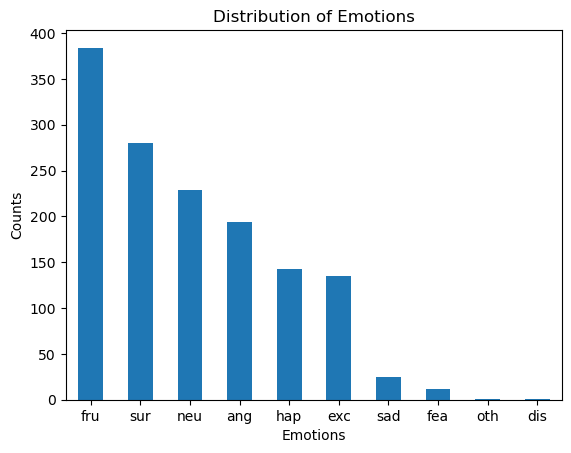

In [16]:
value_counts = df["emotion"].value_counts()
ax = value_counts.plot(kind='bar')

ax.set_xticklabels(['fru', 'sur', 'neu', 'ang', 'hap', 'exc', 'sad', 'fea', 'oth', 'dis'], rotation=0)

plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Counts')

plt.show()

In [17]:
df['emotion']

0       fru
2       sur
5       neu
9       fru
10      fru
       ... 
1813    neu
1814    neu
1815    neu
1816    neu
1817    neu
Name: emotion, Length: 1404, dtype: object

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df['Sentence'], df['label_sentiment'], train_size=0.70, shuffle = True)

In [19]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [20]:
train_tokens = tokenizer(list(x_train), padding = True, truncation=True)
test_tokens = tokenizer(list(x_test), padding = True, truncation=True)

In [21]:
train_tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [22]:
print(train_tokens['input_ids'][0])
print(tokenizer.decode(train_tokens['input_ids'][0]))

[101, 2002, 2387, 2009, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


2024-07-26 22:16:20.889479: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-26 22:16:20.900627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 22:16:20.915301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 22:16:20.918781: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-26 22:16:20.929987: I tensorflow/core/platform/cpu_feature_guar

[CLS] he saw it. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [23]:
class TokenData(Dataset):
    def __init__(self, train = False):
        if train:
            self.text_data = x_train
            self.tokens = train_tokens
            self.labels = list(y_train)
        else:
            self.text_data = x_test
            self.tokens = test_tokens
            self.labels = list(y_test)

    def __len__(self):
        return len(self.text_data)

    def __getitem__(self, idx):
        sample = {}
        for k, v in self.tokens.items():
            sample[k] = torch.tensor(v[idx])
        sample['labels'] = torch.tensor(self.labels[idx])
        return sample

In [24]:
batch_size = 16
train_dataset = TokenData(train = True)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

test_dataset = TokenData(train = False)
test_loader = DataLoader(test_dataset, shuffle=True, batch_size=batch_size)

In [25]:
num_classes = 10
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes) 
optimizer = AdamW(bert_model.parameters(), lr=2e-5) 
loss_fn = torch.nn.CrossEntropyLoss()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
torch.cuda.empty_cache()

In [27]:
num_epochs = 5
device = "cuda"
bert_model.to(device) # Transfer model to GPU if available

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [29]:
train_losses = []
test_losses = []
test_precisions = []
test_recalls = []
test_f1s = []
test_accuracies = []

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [31]:
from torch.cuda.amp import GradScaler, autocast

scaler = GradScaler()
accumulation_steps = 4

train_losses = []
test_losses = []
accuracies = []
scaler = GradScaler()
accumulation_steps = 4


for epoch in range(num_epochs):
    print("Epoch: ", (epoch + 1))
    bert_model.train()
    optimizer.zero_grad()

    train_loss = 0.0
    for i, batch in enumerate(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}

        # Check for out-of-bound labels
        if (batch['labels'] >= num_classes).any():
            print(f"Out-of-bound label found in batch {i+1}: ", batch['labels'])
            continue  # Skip this batch

        with autocast():
            outputs = bert_model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'])
            pred = outputs.logits

            # Debugging prints
            #print(f"Batch {i+1}: input_ids.shape = {batch['input_ids'].shape}, pred.shape = {pred.shape}, labels.shape = {batch['labels'].shape}")

            loss = loss_fn(pred, batch['labels'])

        scaler.scale(loss).backward()

        if (i + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            torch.cuda.empty_cache()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"\nTraining epoch {epoch + 1} loss: ", avg_train_loss)

    bert_model.eval()
    test_loss = 0.0
    correct = 0
    for i, batch in enumerate(test_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            with autocast():
                outputs = bert_model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'])

            logits = outputs.logits
            loss = loss_fn(logits, batch['labels'])
            test_loss += loss.item()

            correct += (logits.argmax(1) == batch['labels']).sum().item()

    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    accuracy = correct / len(test_loader.dataset)
    accuracies.append(accuracy)
    print(f"\nTesting epoch {epoch + 1} loss: ", avg_test_loss)
    print(f"Testing epoch {epoch + 1} accuracy: ", accuracy * 200)

Epoch:  1

Training epoch 1 loss:  2.1206842237903225

Testing epoch 1 loss:  1.9405381944444444
Testing epoch 1 accuracy:  55.45023696682464
Epoch:  2

Training epoch 2 loss:  1.9163316295992943

Testing epoch 2 loss:  1.8747106481481481
Testing epoch 2 accuracy:  56.39810426540285
Epoch:  3

Training epoch 3 loss:  1.8481653698029057

Testing epoch 3 loss:  1.8405671296296295
Testing epoch 3 accuracy:  58.29383886255924
Epoch:  4

Training epoch 4 loss:  1.781934513199714

Testing epoch 4 loss:  1.800853587962963
Testing epoch 4 accuracy:  58.29383886255924
Epoch:  5

Training epoch 5 loss:  1.7032278737714213

Testing epoch 5 loss:  1.8228443287037037
Testing epoch 5 accuracy:  51.65876777251185


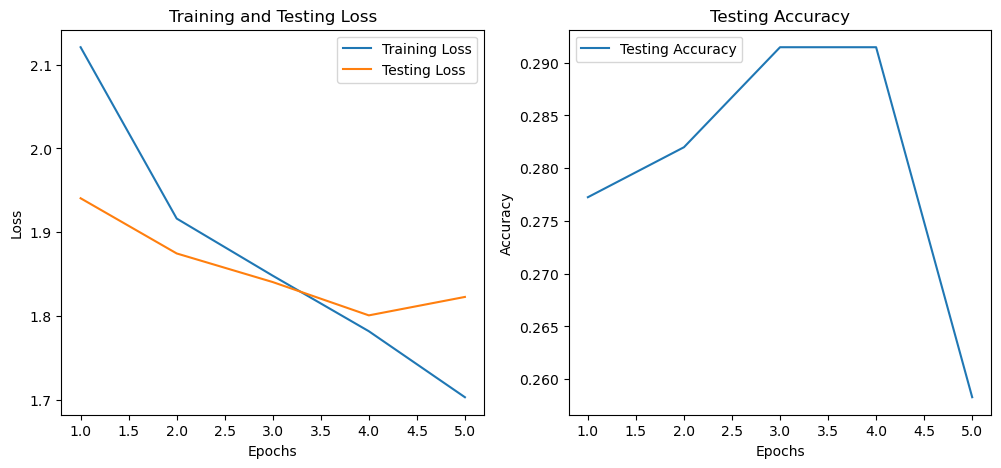

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.title('Testing Accuracy')
plt.legend()

plt.show()